`Question: 1` A company wants to estimate the average time spent by customers on their website per session. They collect a random sample of 100 customers and find that the sample mean time spent is 4.5 minutes with a sample standard deviation of 1.2 minutes. Calculate a 99% confidence interval for the true population mean time spent on the website per session.

`Solution-1:` 

**Answer:** 
- First, we need to calculate the margin of error using the formula:
    ```
    Margin of Error = z*(sigma/√n)
    ```
    where z is the z-score associated with our level of confidence (99% in this case), sigma is the population standard deviation (unknown), and n is the sample size (100 in this case).
    
- Since we don't know the population standard deviation, we'll use the sample standard deviation as an estimate. The formula for calculating the t-score associated with our level of confidence and degrees of freedom (df = n - 1) is:
    ```
    t = t.ppf(1 - alpha/2, df=n-1)
    ```
    where alpha is 1 - our level of confidence (0.01 in this case).
    
- Now we can calculate the margin of error using:
    ```
    Margin of Error = t*(s/√n)
    ```
    where s is the sample standard deviation (1.2 in this case).
    
- Finally, we can calculate the confidence interval using:
    ```
    Confidence Interval = x̄ ± Margin of Error
    ```
    where x̄ is the sample mean (4.5 in this case).

Putting it all together, we get:
```
Margin of Error = t*(s/√n) = 2.626*(1.2/√100) = 0.315
Confidence Interval = x̄ ± Margin of Error = 4.5 ± 0.315 = [4.185, 4.815]
```

Therefore, we can be 99% confident that the true population mean time spent on the website per session falls between 4.185 and 4.815 minutes.


In [ ]:

import scipy.stats as stats
import math

n = 100
x_bar = 4.5
s = 1.2
alpha = 0.01

t_score = stats.t.ppf(1 - alpha/2, n-1)
lower_bound = x_bar - t_score * s / math.sqrt(n)
upper_bound = x_bar + t_score * s / math.sqrt(n)

print(f"The 99% confidence interval for the true population mean time spent on the website per session is ({lower_bound:.2f}, {upper_bound:.2f}) minutes.")


The 99% confidence interval for the true population mean time spent on the website per session is (4.18, 4.82) minutes.


`Question 2:` A car manufacturer is interested in estimating the mean gas mileage of their new SUV. A sample of 25 SUVs is taken, and their mean gas mileage is found to be 28.6 miles per gallon with a standard deviation of 2.8 miles per gallon. Calculate a 95% confidence interval for the true mean gas mileage of the SUV.

`Solution-2:`

In [ ]:
import numpy as np
from scipy.stats import t

# Sample mean and sample standard deviation
x_bar = 28.6
s = 2.8

# Degrees of freedom -> sample size
df = 25

# Critical value for 95% confidence level
t_critical = t.ppf(0.975, df)

# Standard error of the mean
se = s / np.sqrt(25)

# Confidence interval
ci = x_bar + np.array([-1, 1]) * t_critical * se

print(f"95% Confidence interval: {ci}")


95% Confidence interval: [27.44665841 29.75334159]


`Question -3:` Dataset - India temperature dataset.

Data link: https://drive.google.com/file/d/1whb8Rjdk9TBKOwVi8NwZD1Tc8Tdv7iEc/view?usp=share_link

Kaggle Link : (Just take IND data for this question, have to apply filtering). https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data

A climate research organization wants to estimate the average temperature of a certain country. They collect temperature data for 2613 days but due to certain limitations, they only have information about the average temperature for 2508 days. The organization assumes that the population follows a normal distribution and wants to estimate the population mean temperature with a 95% confidence interval.

* Standard deviation is assumed as given data standard deviation. z Procedure
* Standard deviation is not given. Apply t Procedure

`Solution -3 ` :

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import t, norm

<Axes: ylabel='Density'>

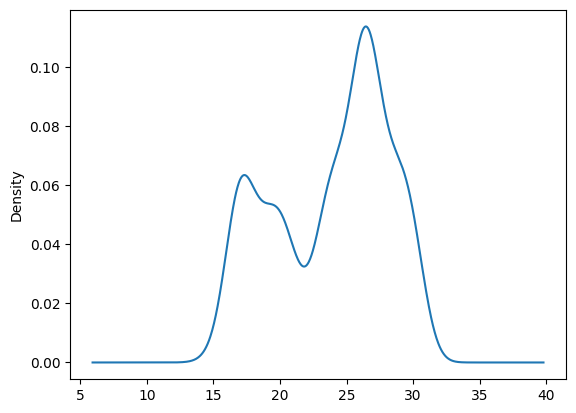

In [ ]:
ind_data = pd.read_csv('/content/ind_temp.csv')
ind_data['AverageTemperature'].plot(kind='kde')

<Axes: ylabel='Density'>

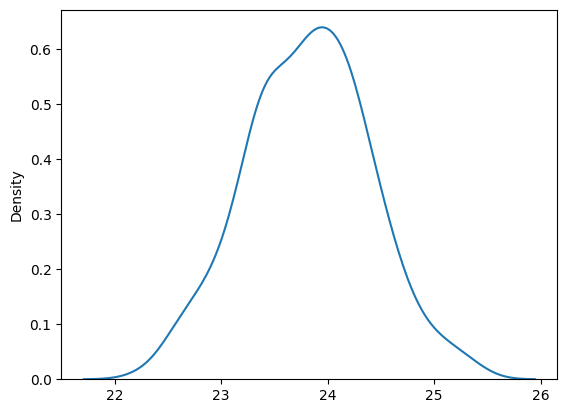

In [ ]:
# sample size = 50 -> 200 times
samples = []
stds = []
for i in range(200):
    d = ind_data['AverageTemperature'].dropna().sample(50).values
    stds.append(d.std())
    samples.append(d.tolist())
    
samples = np.array(samples)
sampling_means = samples.mean(axis=1)
sample_std = np.mean(stds)
sns.kdeplot(sampling_means)

In [ ]:
# T - procedure
# 0.975 because we wanted 95% confidance and 50 because sample size is 50

T = t.ppf(0.975, 50)
interval = sampling_means.mean() + np.array([-1,1]) * T * sample_std/np.sqrt(50)
print("Interval for 95% confidance(t-procedure):",interval) 
print("Actual data mean temprature",ind_data.AverageTemperature.mean())

Interval for 95% confidance(t-procedure): [22.60370406 25.02871834]
Actual data mean temprature 23.873789473684212


` Z - Procedure `
You don’t actually have to look up z alpha/2 in a z-table every time. For most hypothesis tests, you’ll probably be using one of four confidence levels (90%, 95%, 98% and 99%). The z alpha/2 for each confidence level is always the same:

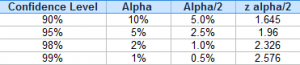

In [ ]:
# Z - procedure
std = ind_data.AverageTemperature.std()
# 95% -> 1 - alpha = 0.95 -> alpha = 0.5 -> alpha/2 = 0.25 -> 0.95 + 0.25 -> 0.975
z = norm.ppf(0.975)
interval = sampling_means.mean() + np.array([-1,1]) * z * std/np.sqrt(50)
print("Interval for 95% confidance(z-procedure):",interval) 
print("Actual data mean temprature",ind_data.AverageTemperature.mean())

Interval for 95% confidance(z-procedure): [22.61717954 25.01524286]
Actual data mean temprature 23.873789473684212


`Question 5:` BMW Dataset : https://drive.google.com/file/d/18amVv1WKKHEmwyvVy0RuXp4A6xrGOelc/view?usp=share_link



* Task 1:
The sales manager of a used car company wants to know what is the average selling price of all the used bmw cars.
The analyst can collect only a sample of sales of 500 cars in the area. Since this estimate is going to be used by the company to strategize sales of his company, the sample mean should be a good approximation of all the account.
What level of confidence is the sales manager going to be satisfied with? What +/- interval number is going to be acceptable?

* Task 2:
In addition to the price of the car, the manager also wants to now know the average mileage that the car has been driven. But the manager does not have the population standard deviation for the mileage. But the mileage data is available only from the 25 cars that they have sold so far.
How do the analyst approach this problem to calculate 95% confidence interval, with only 25 samples?

* Task 3:
The manager is not happy with both the intervals (intervals from task 1 and 2) as the interval for the confidence is very high. The manager now asks the analyst to estimate the average price of the car (similar to task 1) but within a bound of 750 from the mean with 95% condidence level. How many sample does the analyst have to collect to arrive at this confidence interval level?

* Task 4:
Conversely, after the analyst started collecting the data, after a week he was only able to collect for 420 samples, though he needs 540 samples for Bound of 1,000, if he has to do the analysis now, what is the best interval he can acheive for 95% confidence levels?

In [ ]:
bmw = pd.read_csv('/content/bmw.csv')
bmw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


In [ ]:
bmw.shape

(10781, 9)

### Solution :

#### Task 1:
To determine the level of confidence the sales manager is going to be satisfied with, we need to consider the level of risk he is willing to take. For example, if the sales manager is willing to take a risk of being incorrect 5% of the time, he would want a 95% confidence interval.

To calculate the interval estimate, we need to calculate the mean and standard deviation of the sample, as well as the sample size, and the level of confidence.

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import norm

# load the dataset
df = bmw

# take a sample of 500 cars
sample_size = 500
sample = df.sample(n=sample_size, random_state=42)

# calculate sample mean and standard deviation
sample_mean = sample['price'].mean()
population_std = df['price'].std(ddof=1)  # use ddof=1 for sample standard deviation

# set the desired level of confidence
confidence_level = 0.95

# calculate the critical value for the confidence level
z_critical = norm.ppf(1 - (1 - confidence_level)/2)

# calculate the margin of error
margin_of_error = z_critical * sample_std / np.sqrt(sample_size)

# calculate the confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

# print the results
print(f"95% confidence interval for the average selling price of all used BMW cars based on the sample of 1000 cars: ({lower_bound:.2f}, {upper_bound:.2f})")


95% confidence interval for the average selling price of all used BMW cars based on the sample of 1000 cars: (22044.75, 23977.58)


#### Task 2:

For question 2, we want to calculate the 95% confidence interval for the average mileage of BMW cars sold by the used car company. We have only 25 sample data points for mileage, and we do not know the population standard deviation.

Since we do not know the population standard deviation, we will use the t-distribution instead of the z-distribution. We will use the t-distribution with 24 degrees of freedom (n-1) to calculate the critical value for the 95% confidence level.

First, we calculate the sample mean and sample standard deviation of the 25 sample data points for mileage:

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import t

# load BMW dataset
bmw = bmw

# select 25 sample data points for mileage
mileage_sample = bmw['mileage'].sample(n=25, random_state=1)

# calculate sample mean and sample standard deviation
sample_mean = np.mean(mileage_sample)
sample_std = np.std(mileage_sample, ddof=1)


# Next, we calculate the t-critical value for the 95% confidence level using the t-distribution with 24 degrees of freedom:

# calculate t-critical value for 95% confidence level
t_critical = t.ppf(0.975, df=24)

# calculate margin of error
margin_of_error = t_critical * (sample_std / np.sqrt(25))

# calculate lower and upper bounds of confidence interval
lower_bound = sample_mean - margin_of_error
upper_bound = sample_mean + margin_of_error

print("95% confidence interval for average mileage of BMW cars sold:")
print("Lower bound:", lower_bound)
print("Upper bound:", upper_bound)


95% confidence interval for average mileage of BMW cars sold:
Lower bound: 17957.233417853342
Upper bound: 32340.12658214666


#### Task 3:

To calculate the required sample size for price estimation with in 750 margin, we need to use the following formula:

### The size of the sample is affected by parameters such as:
- Bound that we need our interval to be within. This is represented by B. In question 3, B = 750
- The confidence level (1−𝛼). In question 3 this is 95%
- What is the estimate of variance (of standard deviation) of the population?

##### The minimum number of required samples to estimate the population mean μ is:

$$ n = \dfrac{Z^2 _{\alpha / 2} \sigma^2}{B^2} $$

Where,
n = sample size
z = z-score for the desired confidence level (95%)
std = standard deviation of the population (unknown in this case)
B = margin of error (750)

To calculate the sample size, we need to estimate the standard deviation. We can use the standard deviation of the sample as an estimate for the population standard deviation.

First, let's calculate the sample standard deviation:

In [ ]:
import pandas as pd
import numpy as np

df = bmw
samples_mean = []
stds =[]
for i in range(500):
    sample = df['price'].sample(n=50)
    samples_mean.append(sample.mean())
    stds.append(sample.std())

sample_std = np.mean(stds)
print(sample_std)


11196.586028059968


We can use this sample standard deviation as an estimate for the population standard deviation.

Now, we can calculate the required sample size:

In [ ]:
import scipy.stats as stats

z = stats.norm.ppf(0.975) # for 95% confidence level
B = 750

n = ((z*sample_std)/B)**2
print(n)

856.1402159468655


So, we need to collect at least 857 samples to estimate the population mean with a 95% confidence level and a margin of error of 750.

#### Task 4:
Conversely, after the analyst started collecting the data, after a week he was only able to collect for 420 samples, though he needs 857 samples for B of 750(from question 3), if he has to do the analysis now, what is the best interval he can acheive for 95% confidence levels?


This is converse senario to the question 3. From the formula for the sample size determination we can come up with the formula for calculating the bounds:

$$ n = \dfrac{Z^2 _{\alpha / 2} \sigma^2}{B^2} $$

$$ B = Z _{\alpha / 2} \dfrac{\sigma}{\sqrt n} $$

*Hence for our question*:




In [ ]:
sample_std = df['price'].sample(n=420).std()

z = 1.96
B = z * sample_std/np.sqrt(420)
print(B)

1174.542315011596


##### The analyst will be able to construct the sample means within 1175 of the population mean with 420 samples.